# Testing Porespy with 3D image 288x288x300

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import matplotlib.image as imgag
import imageio
import numpy as np
import scipy as sp
import scipy.ndimage as spim
import openpnm as op
from porespy.filters import find_peaks, trim_saddle_points, trim_nearby_peaks
from skimage.morphology import watershed
from porespy.tools import randomize_colors

In [2]:
#%ls
im=np.load('mtest3Dimage.npy')
im.shape

(288, 288, 300)

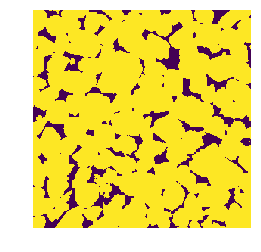

In [3]:
plt.imshow(im[:,:,299])
plt.axis('off')
plt.show()

(-0.5, 299.5, 287.5, -0.5)

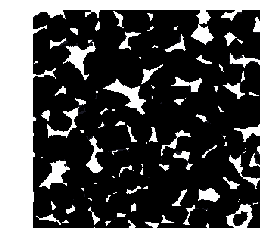

In [4]:
plt.imshow(ps.visualization.sem(im), cmap=plt.cm.bone)
plt.axis('off')

In [5]:
snow_output = ps.network_extraction.snow_dual(im,
                                        voxel_size=1,
                                        boundary_faces=['left','right','front','back','top','bottom'],
                                        marching_cubes_area=False)

____________________________________________________________
Beginning SNOW Algorithm
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  527
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a lar

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a lar

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a lar

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a lar

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Maximum number of iterations reached, considerrunning again with a lar

Maximum number of iterations reached, considerrunning again with a larger value of max_iters
Peaks after trimming saddle points:  458
Peaks after trimming nearby peaks:  458


c:\users\mt\anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


____________________________________________________________
Beginning SNOW Algorithm
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  1
Peaks after trimming saddle points:  1
Peaks after trimming nearby peaks:  1
____________________________________________________________
Extracting pore and throat information from image


100%|████████████████████████████████████████████████████████████████████████████████| 607/607 [01:21<00:00,  7.49it/s]


In [6]:
#SAME results here 
# snow_output = ps.network_extraction.snow(im,
#                                         voxel_size=1,
#                                         boundary_faces=['left','right','front','back','top','bottom'],
#                                         marching_cubes_area=False)

# advancing approach 

In [7]:
sigma = 0.4
dt = spim.distance_transform_edt(input=im)
dt = spim.gaussian_filter(input=dt, sigma=sigma)
peaks = find_peaks(dt=dt)

In [8]:
print('Initial number of peaks: ', spim.label(peaks)[1])
peaks = trim_saddle_points(peaks=peaks, dt=dt, max_iters=500)
print('Peaks after trimming saddle points: ', spim.label(peaks)[1])
peaks = trim_nearby_peaks(peaks=peaks, dt=dt)
peaks, N = spim.label(peaks)
print('Peaks after trimming nearby peaks: ', N)

Initial number of peaks:  1970
Peaks after trimming saddle points:  1482
Peaks after trimming nearby peaks:  1425


In [9]:
regions = watershed(image=-dt, markers=peaks, mask=dt > 0)
regions = randomize_colors(regions)

c:\users\mt\anaconda3\lib\site-packages\skimage\util\arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


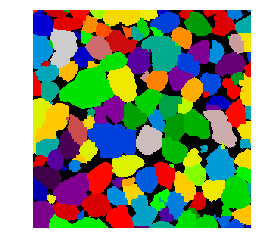

In [10]:
plt.imshow((regions*im)[:, :, 100], cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.show()

In [11]:
net = ps.network_extraction.regions_to_network(im=regions*im, dt=dt, voxel_size=1)


____________________________________________________________
Extracting pore and throat information from image


100%|██████████████████████████████████████████████████████████████████████████████| 1425/1425 [00:22<00:00, 57.16it/s]


In [12]:
net2 = ps.network_extraction.regions_to_network(im=regions*im, dt=dt, voxel_size=1, boundary_faces=['left','right','front','back','top','bottom'])

TypeError: regions_to_network() got an unexpected keyword argument 'boundary_faces'

In [13]:
pn = op.network.GenericNetwork()
pn.update(net)
prj = pn.project
prj.export_data(filename='FontainExtracted_network', filetype='vtk')

In [14]:
im = ps.tools.align_image_with_openpnm(im).astype(int)
ps.io.to_vtk(im, path='.FontainExtracted_network')

(-0.5, 1494.5, 789.5, -0.5)

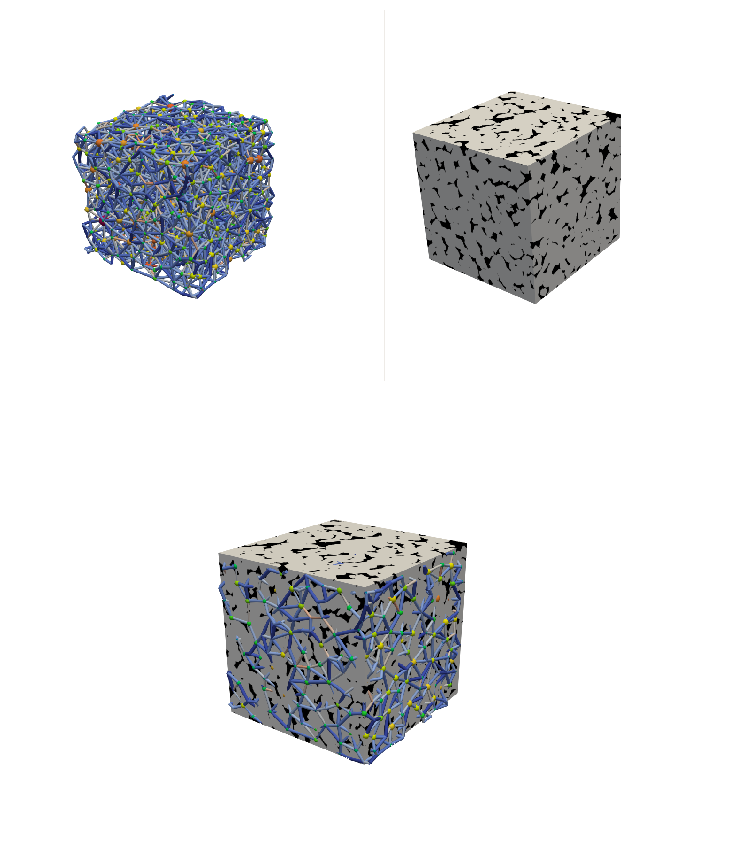

In [15]:
plt.figure(figsize = (15,15))
img0=imgag.imread('mtTESTporespy.png')
img=imgag.imread('netAndimagb.png')
plt.subplot(211)
plt.imshow(img0)
plt.axis('off')
plt.subplot(212)
plt.imshow(img)
plt.axis('off')
